In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm

Load the 3 datasets (all extracted features included)

In [2]:
X_train = pd.read_csv("../train_val_test_datasets/X_train.csv") 
X_val = pd.read_csv("../train_val_test_datasets/X_val.csv") 
X_test = pd.read_csv("../train_val_test_datasets/X_test.csv")

y_train = pd.read_csv("../train_val_test_datasets/y_train.csv") 
y_val = pd.read_csv("../train_val_test_datasets/y_val.csv")
y_test = pd.read_csv("../train_val_test_datasets/y_test.csv")

Choose selected features with respect to different methods. Define a file to save the results

In [3]:
results_file = r"../classifiers_results/feature_selection_rfe_results.txt"
selected_features_list = 'rfe.txt'
f = open(results_file, "w")

# Get selected features

Folder 'important_features' includes .txt files which contain the features that each feature selection method selected

In [4]:
selected_feats=[]
with open(r'../important_features/'+selected_features_list, 'r') as fp:
    for line in fp:
        x = line[:-1]
        selected_feats.append(x)

X_train = X_train[selected_feats] #extract only these features
X_val = X_val[selected_feats]
X_test = X_test[selected_feats]

In [5]:
print(f' {len(selected_feats)} features have been selected')

 66 features have been selected


# Model selection

In [6]:
scaler = StandardScaler()
s = scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
def print_metrics(y_val,y_pred,f,classifier):
    f.write(f'{classifier} Precision: {precision_score(y_val,y_pred)}\n')
    f.write(f'{classifier} Recall: {recall_score(y_val,y_pred)}\n')
    f.write(f'{classifier} f1_score: {f1_score(y_val,y_pred)}\n')
    f.write(f'{classifier} Accuracy: {accuracy_score(y_val,y_pred)}\n')
    f.write('---------------------------------------------------------------------------\n')
    '''
    print(f'{classifier} Precision: {precision_score(y_val,y_pred)}')
    print(f'{classifier} Recall: {recall_score(y_val,y_pred)}')
    print(f'{classifier} f1_score: {f1_score(y_val,y_pred)}')
    print(f'{classifier} Accuracy: {accuracy_score(y_val,y_pred)}')
    '''

# Logistic Regression

In [8]:
params = {'penalty' : ['l1', 'l2', 'none','elasticnet'], 
          'C' : [0.01, 0.1, 1, 10, 100, 1000] }

log_reg_models = []
for p in params['penalty']:
    for c in params['C']:
        l1_ratio = 0.1 if p == 'elasticnet' else None
        clf = LogisticRegression(penalty=p,C=c,random_state=0,max_iter=5000,solver='saga',l1_ratio=l1_ratio).fit(X_train, y_train) 
       
        y_pred_train = clf.predict(X_train)
        y_pred_val = clf.predict(X_val)
        
        f1_train = f1_score(y_train,y_pred_train)
        f1_val = f1_score(y_val,y_pred_val)
        
        log_reg_models.append((clf,f1_val,abs(f1_val-f1_train)))

In [10]:
for i in range(len(log_reg_models)):
    if log_reg_models[i][1] > 0.6:
        print(log_reg_models[i][1],log_reg_models[i][2],i)
        
model_selected = log_reg_models[18][0]
print(model_selected)

0.6153846153846153 0.007384615384615323 6
0.6470588235294118 0.08810685846390953 18
LogisticRegression(C=0.01, l1_ratio=0.1, max_iter=5000, penalty='elasticnet',
                   random_state=0, solver='saga')


Test set metrics:
Precision: 0.6666666666666666
Recall: 0.38461538461538464
f1_score: 0.4878048780487804
Accuracy: 0.8157894736842105

Confusion matrix:


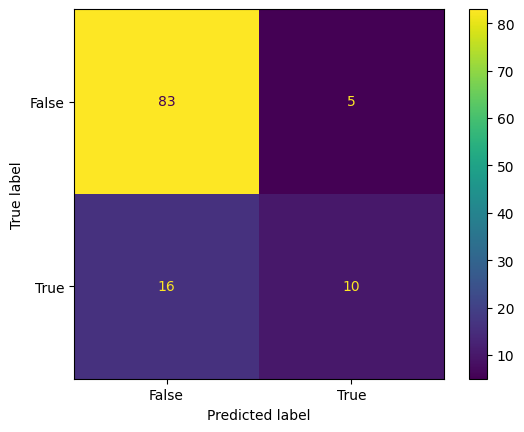

In [11]:
y_pred_test = model_selected.predict(X_test)

print('Test set metrics:')
print(f'Precision: {precision_score(y_test,y_pred_test)}')
print(f'Recall: {recall_score(y_test,y_pred_test)}')
print(f'f1_score: {f1_score(y_test,y_pred_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_test)}\n')
print(f'Confusion matrix:')

cm = confusion_matrix(y_test,y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print_metrics(y_test,y_pred_test,f,"Logistic Regression")

# SVM

In [12]:
params = {'C' : [0.01, 0.1, 1, 10, 100, 1000],
         'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
         'gamma' : ['scale','auto'] }

svm_models = []
for c in params['C']:
    for k in params['kernel']:
        for g in params['gamma']:
        
            clf = svm.SVC(C=c,kernel=k,gamma=g).fit(X_train, y_train) 
       
            y_pred_train = clf.predict(X_train)
            y_pred_val = clf.predict(X_val)

            f1_train = f1_score(y_train,y_pred_train)
            f1_val = f1_score(y_val,y_pred_val)

            svm_models.append((clf,f1_val,abs(f1_val-f1_train)))

In [13]:
for i in range(len(svm_models)):
    if svm_models[i][1] > 0.5:
        print(svm_models[i][1],svm_models[i][2],i)
        
model_selected = svm_models[1][0]
print(model_selected)

0.6486486486486486 0.026080555263434557 0
0.6486486486486486 0.026080555263434557 1
0.6046511627906977 0.07160783001505766 8
0.6046511627906977 0.07160783001505766 9
0.5652173913043478 0.1340833079963516 16
0.5652173913043478 0.1340833079963516 17
0.5909090909090909 0.06260720411663812 22
0.5909090909090909 0.06260720411663812 23
0.5652173913043478 0.16330494546541174 24
0.5652173913043478 0.16330494546541174 25
0.5777777777777778 0.17305278700627524 32
0.5777777777777778 0.17305278700627524 33
0.5777777777777778 0.1878987898789879 40
0.5777777777777778 0.1878987898789879 41
SVC(C=0.01, gamma='auto', kernel='linear')


Test set metrics:
Precision: 0.6923076923076923
Recall: 0.6923076923076923
f1_score: 0.6923076923076923
Accuracy: 0.8596491228070176

Confusion matrix:


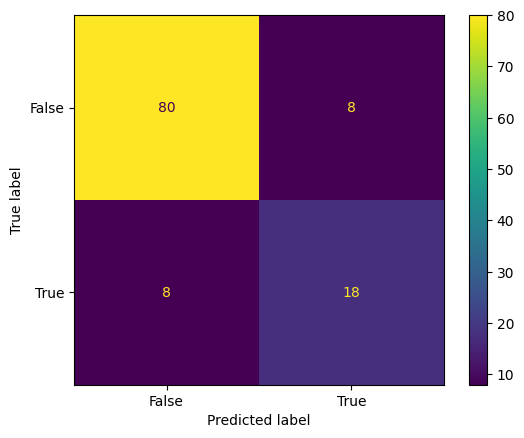

In [14]:
y_pred_test = model_selected.predict(X_test)

print('Test set metrics:')
print(f'Precision: {precision_score(y_test,y_pred_test)}')
print(f'Recall: {recall_score(y_test,y_pred_test)}')
print(f'f1_score: {f1_score(y_test,y_pred_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_test)}\n')
print(f'Confusion matrix:')

cm = confusion_matrix(y_test,y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print_metrics(y_test,y_pred_test,f,"SVM")

# Naive Bayes

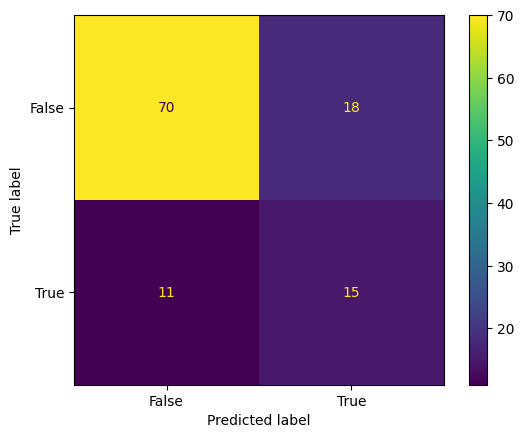

In [15]:
new_X_train = np.append(X_train,X_val,axis=0)
new_y_train = np.append(y_train,y_val,axis=0)

clf2 = GaussianNB()
clf2.fit(new_X_train, new_y_train)
y_pred = clf2.predict(X_test)
print_metrics(y_test,y_pred,f,"Naive Bayes")

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# KNN

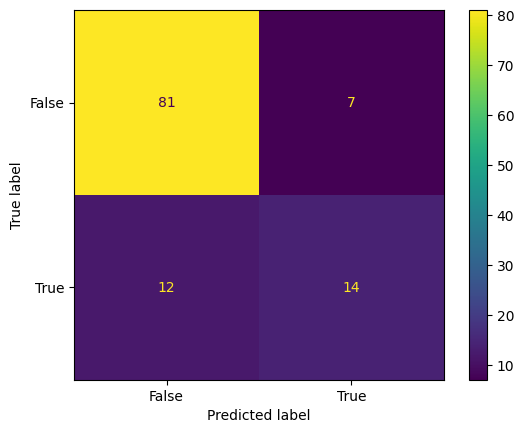

In [16]:
clf3 = KNeighborsClassifier(n_neighbors=5)
clf3.fit(new_X_train, new_y_train)
y_pred = clf3.predict(X_test)
print_metrics(y_test,y_pred,f,"KNN")

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# Decision Tree

In [17]:
params = {'criterion' : ['gini', 'entropy', 'log_loss'],
         'splitter' : ['best', 'random'],
         'max_depth' : [10,50,100,200,500],
         'min_samples_split': [2,5,10,20,40],
         'min_samples_leaf': [1,5,10,20,50]}

tree_models = []
for c in params['criterion']:
    for s in params['splitter']:
        for md in params['max_depth']:
            for mss in params['min_samples_split']:
                for msl in params['min_samples_leaf']:
                    
                    clf = tree.DecisionTreeClassifier(criterion=c,splitter=s,max_depth=md,min_samples_split=mss,min_samples_leaf=msl).fit(X_train, y_train) 

                    y_pred_train = clf.predict(X_train)
                    y_pred_val = clf.predict(X_val)

                    f1_train = f1_score(y_train,y_pred_train)
                    f1_val = f1_score(y_val,y_pred_val)

                    tree_models.append((clf,f1_val,abs(f1_val-f1_train)))


In [19]:
for i in range(len(tree_models)):
    if tree_models[i][1] >= 0.55:
        print(tree_models[i][1],tree_models[i][2],i)
        
model_selected = tree_models[143][0]
print(model_selected)

0.5625 0.24519230769230776 129
0.5769230769230769 0.005166475315729113 143
0.5581395348837208 0.12413471260791809 187
0.5769230769230769 0.11511844556827255 242
0.5531914893617021 0.0023640661938534313 378
0.6181818181818182 0.01168362323596972 398
DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=20,
                       splitter='random')


Test set metrics:
Precision: 0.41379310344827586
Recall: 0.46153846153846156
f1_score: 0.43636363636363634
Accuracy: 0.7280701754385965

Confusion matrix:


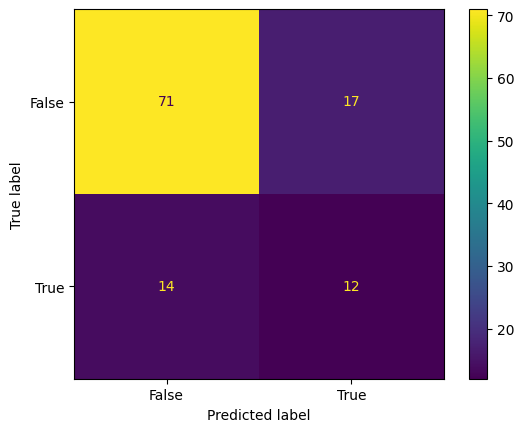

In [20]:
y_pred_test = model_selected.predict(X_test)

print('Test set metrics:')
print(f'Precision: {precision_score(y_test,y_pred_test)}')
print(f'Recall: {recall_score(y_test,y_pred_test)}')
print(f'f1_score: {f1_score(y_test,y_pred_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_test)}\n')
print(f'Confusion matrix:')

cm = confusion_matrix(y_test,y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print_metrics(y_test,y_pred_test,f,"Decision Tree")

# LDA

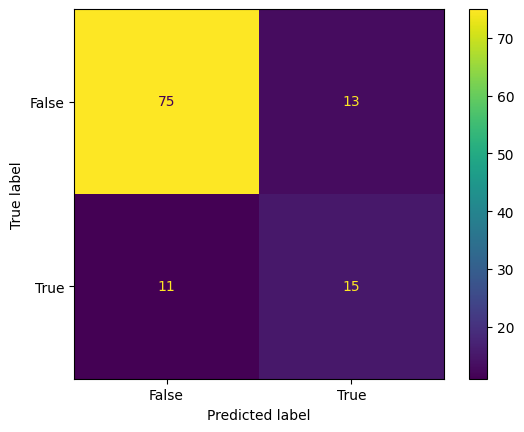

In [21]:
clf5 = LinearDiscriminantAnalysis()
clf5.fit(new_X_train, new_y_train)
y_pred = clf5.predict(X_test)
print_metrics(y_test,y_pred,f,"LDA")

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# QDA

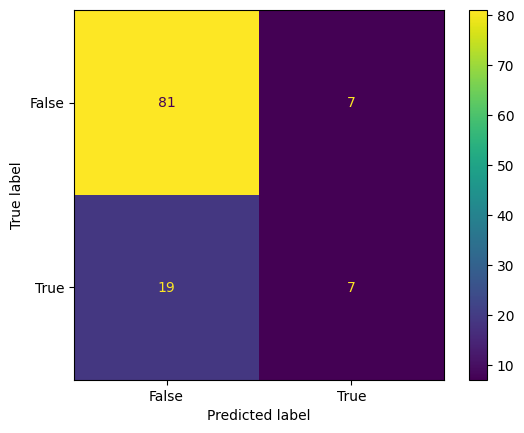

In [22]:
clf6 = QuadraticDiscriminantAnalysis()
clf6.fit(new_X_train, new_y_train)
y_pred = clf6.predict(X_test)
print_metrics(y_test,y_pred,f,"QDA")

cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

# ADABOOST

In [23]:
params = {'n_estimators' : [10, 50, 100],
         'learning_rate' : [0.1, 0.5, 0.8, 1.0],
         'algorithm' : ['SAMME','SAMME.R'] }

ada_models = []
for est in params['n_estimators']:
    for lr in params['learning_rate']:
        for a in params['algorithm']:
        
            clf = AdaBoostClassifier(n_estimators=est, random_state=0, learning_rate=lr, algorithm=a).fit(X_train, y_train)
       
            y_pred_train = clf.predict(X_train)
            y_pred_val = clf.predict(X_val)

            f1_train = f1_score(y_train,y_pred_train)
            f1_val = f1_score(y_val,y_pred_val)

            ada_models.append((clf,f1_val,abs(f1_val-f1_train)))


In [26]:
for i in range(len(ada_models)):
    if ada_models[i][1] > 0.5:
        print(ada_models[i][1],ada_models[i][2],i)
        
model_selected = ada_models[6][0]
print(model_selected)

0.5098039215686274 0.1852315394242805 4
0.5652173913043478 0.10144927536231885 6
0.5581395348837208 0.14815417140998555 7
0.5454545454545454 0.2192513368983957 10
0.5416666666666666 0.2697212336892052 12
0.5333333333333333 0.3733333333333334 13
0.5714285714285715 0.2695608278647147 14
0.5490196078431373 0.37813271003765747 22
AdaBoostClassifier(algorithm='SAMME', n_estimators=10, random_state=0)


Test set metrics:
Precision: 0.48
Recall: 0.46153846153846156
f1_score: 0.47058823529411764
Accuracy: 0.7631578947368421

Confusion matrix:


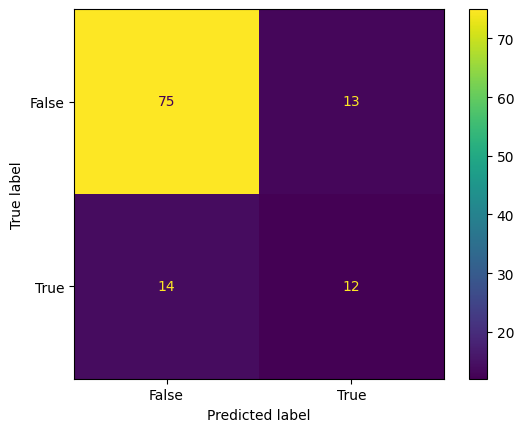

In [27]:
y_pred_test = model_selected.predict(X_test)

print('Test set metrics:')
print(f'Precision: {precision_score(y_test,y_pred_test)}')
print(f'Recall: {recall_score(y_test,y_pred_test)}')
print(f'f1_score: {f1_score(y_test,y_pred_test)}')
print(f'Accuracy: {accuracy_score(y_test,y_pred_test)}\n')
print(f'Confusion matrix:')

cm = confusion_matrix(y_test,y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print_metrics(y_test,y_pred_test,f,"ADABOOST")

In [28]:
f.close()